In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Q1 A __Percepton algorithm__

In [2]:
def randomData(X,Y):
    '''
    This funtion select random data and it's label
    '''
    
    index = random.randint(0, len(X)-1 )
    return X[index],Y[index]


In [3]:
def perceptron(X,Y,t,n=1):
    '''
    This funtion implement perceptron algorithm 
    Attributes - 
    X - data
    Y - lable
    t - iteration
    n - learning rate
    
    It return learned weights.
    '''
    
    w = np.zeros((4,1))
    
    for i in range(t):
        x_n, y_n = randomData(X,Y)
        x_n = x_n.reshape([4,1])
        
        if (y_n * np.dot(w.T, x_n))[0] <= 0:
            w = w + y_n*x_n

    
    return w

## Q1 B

## __Read data__

In [4]:
header = ['variance','skewness','curtosis','entropy','class']
data = pd.read_csv("data_banknote_authentication.csv",names=header, header=None)
data.head(3)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [5]:
# get data type of data
data.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [6]:
data.isna().sum()
# no missing values

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

#### Data normalization

In [7]:
for column in data.columns:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())    
data.head(3)

,variance,skewness,curtosis,entropy,class
0,0.769004,0.839643,0.106783,0.736628,0.0
1,0.835659,0.820982,0.121804,0.644326,0.0
2,0.786629,0.416648,0.310608,0.786951,0.0


#### Change class as -1 and 1

In [8]:
data.loc[data['class'] == 0, "class"] = -1
data.head(3)

,variance,skewness,curtosis,entropy,class
0,0.769004,0.839643,0.106783,0.736628,-1.0
1,0.835659,0.820982,0.121804,0.644326,-1.0
2,0.786629,0.416648,0.310608,0.786951,-1.0


In [9]:
# Sperate data into feature (X) and lable (Y)
X = data.iloc[:,:-1].to_numpy()
Y = data.iloc[:,-1].to_list()


In [10]:
# funtion to make predictions
def predict(X,w):
    '''
    This funtion make prediction on batch of data
    where 
    X is features of shape (n,4)
    w is weights
    it make prediction and return list of lables
    '''
    Y_predicted = []
    for i in range(len(X)):
        x = X[i].reshape(4,1)
    
        if np.dot(w.T, x)[0] < 0:
            Y_predicted.append(-1)
        else:
            Y_predicted.append(1)
            
    return Y_predicted
        

### Q1 C

In [11]:
# train data using cross validation

In [12]:

def split(X,Y,train_p):
    '''
    This funtion split data into train and test set 
    X is feature 
    Y is lable
    train_p is training set percentage from total data
    '''
    
    XY = np.c_[ X, Y ] 
    np.random.shuffle(XY)  
    
    n = int(len(XY)*train_p/100)
    X = XY[:,:-1]
    Y = XY[:,-1]
    X_train = X[:n]
    Y_train = Y[:n]
    X_test = X[n:]
    Y_test = Y[n:]
        
    return X_train , Y_train ,X_test, Y_test

In [13]:
def crossValidationSplit(X,Y,k=10):
    '''
    This funtion split data into 9:1 train and validation set.
    And return it k times.
    '''
    XY = np.c_[ X, Y ] 
    for i in range(k):
        np.random.shuffle(XY)  
        n = int(len(XY)/10)
        X = XY[:,:-1]
        Y = XY[:,-1]
        X_train = X[:n*9]
        Y_train = Y[:n*9]
        X_val = X[n*9:]
        Y_val = Y[n*9:]
        
        yield X_train , Y_train ,X_val, Y_val

In [14]:
def trainUsingCrossVal():
    '''
    This funtion train model using 10 fold cross validation.
    And return avg error and best model.
    '''
    
    avg_err = 0
    e = 1
    for X_train , Y_train ,X_val, Y_val in crossValidationSplit(X_trainVal,Y_trainVal,k=10):
    
    
        # train Algorithm
        w = perceptron(X_train,Y_train,t=500,n=1)
        
        # make prediction for validation set
        Y_pred = predict(X_val,w)
    
        # calulate error precentage
        tol_wrong_pred = np.logical_xor(np.array(Y_pred)+1, np.array(Y_val)+1).sum() 
        err = tol_wrong_pred / len(Y) 
    
        avg_err += err
    
        # select best model
        if e>err:
            e = err
            bestmodel = w
            
        return (avg_err*10) , bestmodel   




In [21]:
# split data into train and test set
# 80% - train + validation
# 20% - test 
X_trainVal , Y_trainVal ,X_test, Y_test = split(X,Y,80)

# train model
error, model = trainUsingCrossVal()   
print("Avg error for cross validation test set : {:.2f}%".format(error))       

Avg error for cross validation test set : 0.17%


### Q1 D

In [22]:
# get best model we trained above
w = model
        
# make prediction
Y_pred = predict(X_test,w)

# Calculate concution matrix
corr = Y_pred + Y_test
wrg = Y_test + Y_pred
TP = np.count_nonzero(corr == 2)
TN = np.count_nonzero(corr == -2)

FN = np.count_nonzero(wrg == 2)
FP = np.count_nonzero(wrg == -2)

print("confusion matrix:")
print("TP : {}".format(TP))
print("TN : {}".format(TN))
print("FP : {}".format(FP))
print("FN : {}".format(FN))

# calculate Precision and recall
p = TP / (TP+FP)
r = TP / (TP+FN)

print("Precision : {}".format(p))
print("Recall : {}".format(r))

# calculate F1 score
F1 = (2*p*r) / (p+r)
print("F1 Score : {}".format(F1))

confusion matrix:
TP : 65
TN : 151
FP : 151
FN : 65
Precision : 0.30092592592592593
Recall : 0.5
F1 Score : 0.37572254335260113


## Q2 A

In [23]:
def norm_pdf(x, mean, sd):
    '''
    This funtion give normal probability distribution
    for data x and given mean, standard deviation - sd
    '''
    return (1 / (sd * np.sqrt(2*np.pi)) ) * np.exp(-0.5*((x-mean)/sd)**2)

In [24]:
# initial data
# mean and std
liklihood_mean = 10
liklihood_std = 5
prior_mean = 25
prior_std = 5
N = 50

# genrate data with mean 10 and sd 5
x = np.random.normal(loc=liklihood_mean, scale=liklihood_std, size=N)     # liklihood P(Y|8)
x.sort()

In [25]:
def getBayesianPosterior(liklihood_mean,liklihood_std,prior_mean,prior_std,N,x):
    '''
    This funtion find Bayesian Posterior using likelihood and prior 
    '''
    
    theta = np.linspace(0,45,150)
    # Calculate posterior mean and SD
    posterior_std = np.sqrt( np.reciprocal( 1/(prior_std**2) + (N)/(liklihood_std**2) ) )
    posterior_mean = (posterior_std**2) *( (prior_mean/prior_std**2) + ((N*x.mean())/liklihood_std**2))

    # Plot data
    plt.plot(x, norm_pdf(x, 10, 5), label='likelihood')
    plt.plot(theta, norm_pdf(theta, 25, 5), label='prior')
    plt.plot(theta, norm_pdf(theta, posterior_mean, posterior_std), label='posterior')
    plt.legend()
    plt.show()

Above function use following equation to find mean and standard deviation of posterior
### $$ \frac{1}{\sigma_{post}^2}  = \frac{1}{\sigma_{prior}^2} + \frac{N}{\sigma_{x}^2} $$

### $$ \mu_{post} =  \sigma_{post}^{-2} \times \left[\frac{\mu_{prior}}{\sigma_{prior}^2} + \frac{\sum_{i=1}^{N} x_i}{\sigma_{x}^2} \right]$$

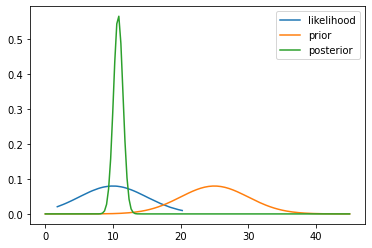

In [26]:
# get BayesianPosterior
getBayesianPosterior(liklihood_mean,liklihood_std,prior_mean,prior_std,N,x)

## Q2 B

In [27]:
def metropolis(data, samples, init_mean=25, proposal_width=5, prior_mean=25, prior_std=5.):
    '''
    This funtion implements metropolis algorithm 
    Attributes
    data - data get collected 
    init_mean - starting point of sampling
    samples - number of sample we need to collect
    
    It return sample of esstimated posterior distribution.
    
    '''
    
    
    current_mean = init_mean
    # add current position 
    posterior = [current_mean]
    for i in range(samples):
        
        # get new position
        new_mean = np.random.normal(loc=current_mean, scale=proposal_width, size=1)[0]

        # Calculate likelihood with new and current mean
        likelihood_current = norm_pdf(data, current_mean, 5).prod()
        likelihood_new = norm_pdf(data, new_mean, 5).prod()
        # Calculate prior probability with new and current mean
        prior_current = norm_pdf(current_mean, prior_mean, prior_std).prod()
        prior_new = norm_pdf(new_mean, prior_mean, prior_std).prod()
        # Calculate posterior probability with new and current mean
        posterior_current = likelihood_current * prior_current
        posterior_new = likelihood_new * prior_new
        
        # Calculate Acceptance ratio 
        ## If ratio > 1 'accept' new position
        ## else take a random number between 0-1. If it is less than acceptance ration than 'accept' else 'reject' new position
        acceptance_ratio = posterior_new / posterior_current
        if np.random.rand() < acceptance_ratio:
            # Accept new position
            current_mean = new_mean
        
        # add possion in list
        posterior.append(current_mean)
        
    return np.array(posterior)

In [28]:
def get_analytical_posterior(data, x,liklihood_std, prior_mean, prior_std):
    '''
    This funtion calculate posterior distribution with given likehood and prior
    '''
    N = len(data)
    posterior_std = np.sqrt( np.reciprocal( 1/(prior_std**2) + (N)/(liklihood_std**2) ) )
    posterior_mean = (posterior_std**2) *( (prior_mean/prior_std**2) + ((N*data.mean())/liklihood_std**2))

    return norm_pdf(x, posterior_mean, posterior_std)

In [29]:
# let's select data used in above quetion
data = x

In [30]:
# genrate sample to estimate posterior distribution using metropolis algorithm
samples = metropolis(data, samples=15000, init_mean=25, proposal_width=0.5, prior_mean=25, prior_std=5.)

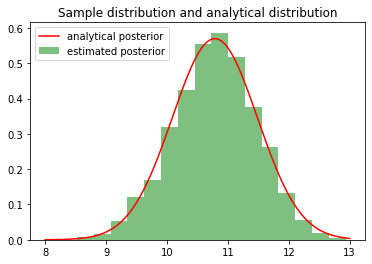

In [31]:
# draw graph
# draw estimated histogram
kwargs = dict(alpha=0.5, bins=16, density=True, stacked=True)
plt.hist(samples[2500:],**kwargs, color='g',label = 'estimated posterior') 

# draw analytical posterior
x = np.linspace(8, 13, 500)
analytical_posterior = get_analytical_posterior(data, x,5,25,5)
plt.plot(x, analytical_posterior,color='r' ,label='analytical posterior')

plt.title("Sample distribution and analytical distribution") 
plt.legend()
plt.show()

## Q2 C

#### The proposal_width can not be too small or large. If we take small proposal_width, then it will take more iterations (more samples) to converge. And if we take large proposal_width, then jumps will not get accepted that frequently.

#### 1. Let's take small proposal_width 0.1 - we will need more iterations to converge with small width

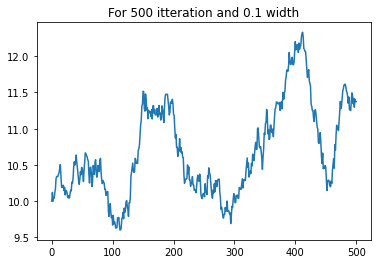

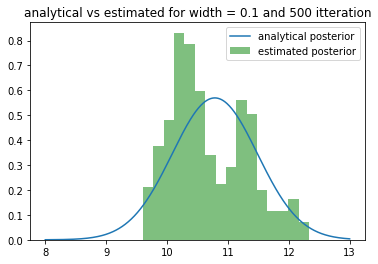

In [32]:
samples = metropolis(data, samples=500, init_mean=10, proposal_width=0.1, prior_mean=25, prior_std=5.)
x_axis = range(0,len(samples))
y_axis = samples
plt.title("For 500 itteration and 0.1 width")
plt.plot(x_axis,y_axis)
plt.show()

kwargs = dict(alpha=0.5, bins=16, density=True, stacked=True)
plt.hist(samples,**kwargs, color='g',label = 'estimated posterior') 
x = np.linspace(8, 13, 500)
analytical_posterior = get_analytical_posterior(data, x,5,25,5)
plt.plot(x, analytical_posterior, label='analytical posterior')
plt.title("analytical vs estimated for width = 0.1 and 500 itteration") 
plt.legend()
plt.show()

#### 2. **Let's take large proposal_width 5** - If we take large width jumps will get accepted less often. And we will require more iterations to converge

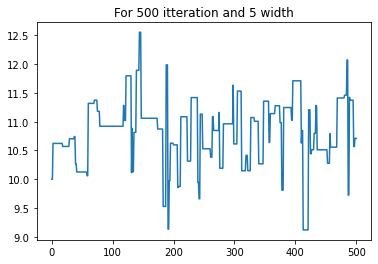

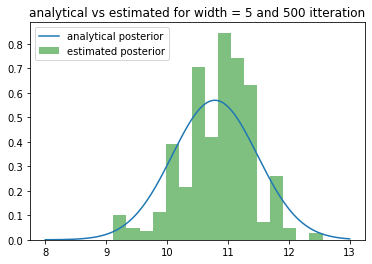

In [33]:
samples = metropolis(data, samples=500, init_mean=10, proposal_width=5, prior_mean=25, prior_std=5.)
x_axis = range(0,len(samples))
y_axis = samples
plt.title("For 500 itteration and 5 width")
plt.plot(x_axis,y_axis)
plt.show()

kwargs = dict(alpha=0.5, bins=16, density=True, stacked=True)
plt.hist(samples,**kwargs, color='g',label = 'estimated posterior') 
x = np.linspace(8, 13, 500)
analytical_posterior = get_analytical_posterior(data, x,5,25,5)
plt.plot(x, analytical_posterior, label='analytical posterior')
plt.title("analytical vs estimated for width = 5 and 500 itteration") 
plt.legend()
plt.show()

#### 3. For 5000 itteration proposal width from 0.5 to 2 is good value.

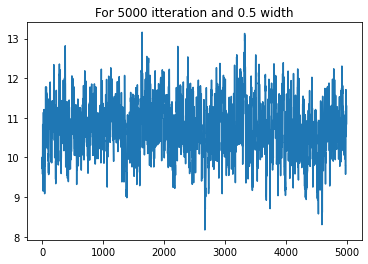

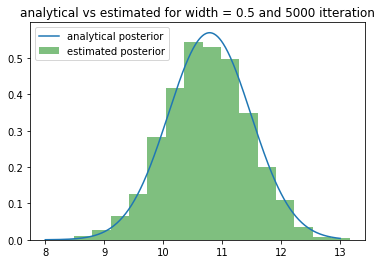

In [34]:
samples = metropolis(data, samples=5000, init_mean=10, proposal_width=0.5, prior_mean=25, prior_std=5.)
x_axis = range(0,len(samples))
y_axis = samples
plt.title("For 5000 itteration and 0.5 width")
plt.plot(x_axis,y_axis)
plt.show()

kwargs = dict(alpha=0.5, bins=16, density=True, stacked=True)
plt.hist(samples,**kwargs, color='g',label = 'estimated posterior') 
x = np.linspace(8, 13, 500)
analytical_posterior = get_analytical_posterior(data, x,5,25,5)
plt.plot(x, analytical_posterior, label='analytical posterior')
plt.title("analytical vs estimated for width = 0.5 and 5000 itteration") 
plt.legend()
plt.show()

#### 4. If we terminated sampling too soon it will not converge to analytical posterior 

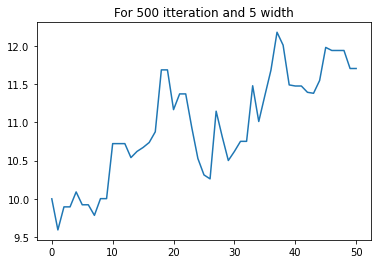

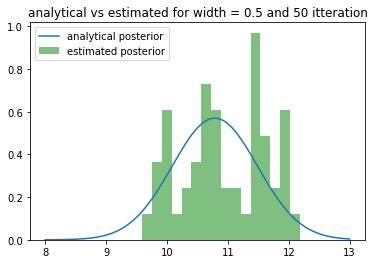

In [35]:
samples = metropolis(data, samples=50, init_mean=10, proposal_width=0.5, prior_mean=25, prior_std=5.)
x_axis = range(0,len(samples))
y_axis = samples
plt.title("For 500 itteration and 5 width")
plt.plot(x_axis,y_axis)
plt.show()

kwargs = dict(alpha=0.5, bins=16, density=True, stacked=True)
plt.hist(samples,**kwargs, color='g',label = 'estimated posterior') 
x = np.linspace(8, 13, 500)
analytical_posterior = get_analytical_posterior(data, x,5,25,5)
plt.plot(x, analytical_posterior, label='analytical posterior')
plt.title("analytical vs estimated for width = 0.5 and 50 itteration") 
plt.legend()
plt.show()